<a href="https://colab.research.google.com/github/finddme/MachineLearning/blob/master/KMeans%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Means-|-실습2" data-toc-modified-id="K-Means-|-실습2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-Means | 실습2</a></span><ul class="toc-item"><li><span><a href="#K-Means-|-실습2-|-데이터-확인" data-toc-modified-id="K-Means-|-실습2-|-데이터-확인-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>K-Means | 실습2 | 데이터 확인</a></span></li><li><span><a href="#K-Means-|-실습2-|-데이터-시각화" data-toc-modified-id="K-Means-|-실습2-|-데이터-시각화-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>K-Means | 실습2 | 데이터 시각화</a></span></li><li><span><a href="#K-Means-|-실습2-|-K-Means-수행" data-toc-modified-id="K-Means-|-실습2-|-K-Means-수행-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>K-Means | 실습2 | K-Means 수행</a></span></li><li><span><a href="#K-Means-|-실습2-|-K-Means-수행-결과-시각화" data-toc-modified-id="K-Means-|-실습2-|-K-Means-수행-결과-시각화-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>K-Means | 실습2 | K-Means 수행 결과 시각화</a></span></li></ul></li></ul></div>

### K-Means | 실습2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.cluster import KMeans # KMeans 리이브러리를 불러온다
from sklearn.datasets import load_iris # scikit-learn이 제공하는 샘플데이터 iris를 불러온다.
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib을 불러온다
%matplotlib inline

#### K-Means | 실습2 | 데이터 확인

In [ ]:
iris = load_iris()
# print(iris) # 뽑아보면 key와 value로 이루어진 것을 알 수 있다.
# Description 속성으로 데이터셋 정보를 확인한다.
# print(iris.DESCR)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print("key: ", iris.keys()) # key값을 뽑아본다.

key:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# data라는 key에 저장된 value의 인덱스 0부터 1까지 뽑아본다.
print("data: ", iris.data[0:3]) 
# feature_names라는 key에 저장된 value를 뽑아본다
print("feature_names: ", iris.feature_names)

data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### K-Means | 실습2 | 데이터 시각화

In [ ]:
'''
아 그 전에 데이터가 어떻게 생겼는지 시각화하여 확인 먼저 해보자.
iris 데이터는 sepal length, sepal width, petal length, petal width 
이렇게 총 4가지 feature를 가지고 있기 때문에 2차원 평만 상에 표현하기 위해서는 
feature의 차원을 2개로 축소시켜 줘야 한다.
즉, 150 rows x 4 column -> 150 x 2로 만들어 줘야 한다.
4개의 feature를 2개로 축소하기 위해 PCA(Principal Component Analysis)를 사용하겠다.
'''
from sklearn.decomposition import PCA

# PCA를 위한 데이터프레임을 다시 만들어보자
iris_PCA_DF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# 출력 dimension을 설정한다. 여기에서는 2차원으로 출력을 원하니까 2.
pca = PCA(n_components = 2) 
# PCA의 fit_transform 속성을 이용해 축소할 데이터를 넣는다.
pca_transformed = pca.fit_transform(iris.data)

# pca_transformed의 인덱스 0과 1을 각각 pca_x, pca_y라는 이름으로 데이터프레임에 추가해준다.
iris_PCA_DF['pca_x'] = pca_transformed[:,0]
iris_PCA_DF['pca_y'] = pca_transformed[:,1]
# iris의 종류를 나타내는 target을 데이터프레임에 추가해준다.
iris_PCA_DF['target'] = iris.target

# iris.target은 iris의 종류를 0, 1, 2로 표현한 데이터이다.
# iris.target_names로 iris 이름을 확인할 수 있다.
# 이름을 종류와 매핑해준다.
mappingDF = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
# 데이터 프레임의 'target'값이 x에 들어가서 x가 0이면 mappingDF의 키값 0의 value값이 매핑된다.
iris_PCA_DF['target'] = iris_PCA_DF['target'].map(lambda x : mappingDF[x])

iris_PCA_DF.sample(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pca_x,pca_y,target
56,6.3,3.3,4.7,1.6,1.095061,0.283468,Versicolour
143,6.8,3.2,5.9,2.3,2.563013,0.277863,Virginica
73,6.1,2.8,4.7,1.2,0.921729,-0.182738,Versicolour
64,5.6,2.9,3.6,1.3,-0.173925,-0.254854,Versicolour
91,6.1,3.0,4.6,1.4,0.890815,-0.034464,Versicolour


C:\Users\yein4\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


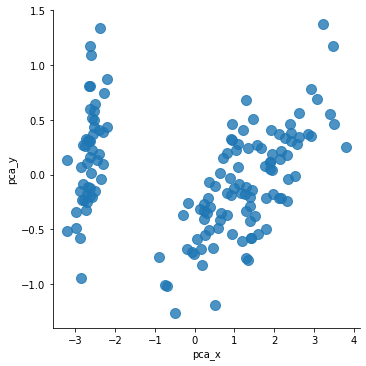

In [ ]:
# target을 고려하지 않았을 때 데이터의 분포는 아래와 같다:
sns.lmplot('pca_x','pca_y', data= iris_PCA_DF, fit_reg=False, scatter_kws={'s': 100})

<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

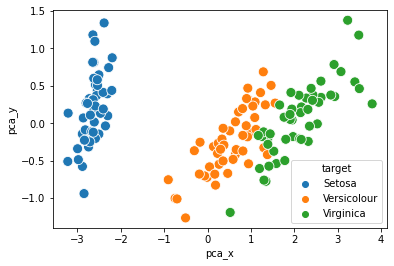

In [ ]:
# target값을 고려해서 각 데이터의 이름이 반영되면 아래와 같아진다:
sns.scatterplot(x= 'pca_x', y = 'pca_y', data= iris_PCA_DF, hue=iris_PCA_DF['target'], s = 100)

#### K-Means | 실습2 | K-Means 수행

In [ ]:
# 이제 K-Means를 수행할 데이터프레임을 만들어보자
iris_KM_DF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(iris_KM_DF.sample(5)) # 데이터프레임 5개만 뽑아서 확인해보자

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
88                 5.6               3.0                4.1               1.3
137                6.4               3.1                5.5               1.8
89                 5.5               2.5                4.0               1.3
21                 5.1               3.7                1.5               0.4
87                 6.3               2.3                4.4               1.3


In [ ]:
# KMeans 라이브러리의 파라미터로 군집 개수, 최대 반복 횟수를 정해준다.
# iris데이터에서 종류는 3개니까 군집은 3개로, 최대 500번 돌고
# iris_DF라는 데이터프레임에 대해서 군집화를 시킨다.
kmeans1 = KMeans(n_clusters = 3, max_iter = 500, random_state = None).fit(iris_KM_DF)

In [ ]:
kmeans1.cluster_centers_ # 각 클러스터들의 중심 위치를 뽑아본다.

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# kmeans를 수행했으니까 각 데이터들이 속한 클러스터를 확인해보자
# 각 데이터의 인덱스에 해당 데이터의 소속 클러스터가 결과로 나온다.
kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
# 데이터 프레임에 cluster라는 이름으로 각 데이터의 클러스터 결과를 넣어준다.
iris_KM_DF['cluster'] = kmeans1.labels_
# 데이터 프레임 인덱스 0부터 150까지 15씩 스탭한 결과를 출력해본다.
# (head를 뽑으면 앞쪽이 다 0이라 중간중간 결과들을 확인하기 위해)
iris_KM_DF[0:150:15]
# 총 3개의 클러스터가 존재하는 것을 확인할 수 있다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
15,5.7,4.4,1.5,0.4,1
30,4.8,3.1,1.6,0.2,1
45,4.8,3.0,1.4,0.3,1
60,5.0,2.0,3.5,1.0,0
75,6.6,3.0,4.4,1.4,0
90,5.5,2.6,4.4,1.2,0
105,7.6,3.0,6.6,2.1,2
120,6.9,3.2,5.7,2.3,2
135,7.7,3.0,6.1,2.3,2


In [ ]:
# target값은 정답값이다.
# 클러스터링 결과를 대충 비교해보기 위해 데이터프레임에 넣어본다.
iris_KM_DF['target'] = iris.target
iris_KM_DF[10:150:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
10,5.4,3.7,1.5,0.2,1,0
25,5.0,3.0,1.6,0.2,1,0
40,5.0,3.5,1.3,0.3,1,0
55,5.7,2.8,4.5,1.3,0,1
70,5.9,3.2,4.8,1.8,0,1
85,6.0,3.4,4.5,1.6,0,1
100,6.3,3.3,6.0,2.5,2,2
115,6.4,3.2,5.3,2.3,2,2
130,7.4,2.8,6.1,1.9,2,2
145,6.7,3.0,5.2,2.3,2,2


In [ ]:
mappingDF = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
# 데이터 프레임의 'target'값이 x에 들어가서 x가 0이면 mappingDF의 키값 0의 value값이 매핑된다.
iris_KM_DF['target'] = iris_KM_DF['target'].map(lambda x : mappingDF[x])
iris_KM_DF[10:150:15]
# 대충 봐도 클러스터링 결과와 정답값이 잘 맞는 것 같다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
10,5.4,3.7,1.5,0.2,1,Setosa
25,5.0,3.0,1.6,0.2,1,Setosa
40,5.0,3.5,1.3,0.3,1,Setosa
55,5.7,2.8,4.5,1.3,0,Versicolour
70,5.9,3.2,4.8,1.8,0,Versicolour
85,6.0,3.4,4.5,1.6,0,Versicolour
100,6.3,3.3,6.0,2.5,2,Virginica
115,6.4,3.2,5.3,2.3,2,Virginica
130,7.4,2.8,6.1,1.9,2,Virginica
145,6.7,3.0,5.2,2.3,2,Virginica


In [ ]:
# 각 target에 대해 어떤 클러스터 결과가 존재하는지, 클러스터링 결과는 몇개인지 확인해보자
iris_result = iris_KM_DF.groupby(['target','cluster'])['sepal length (cm)'].count()
print(iris_result)
# 몇개는 군집화가 잘못 됐지만 거의 잘 된 것으로 확인된다.

target       cluster
Setosa       1          50
Versicolour  0          48
             2           2
Virginica    0          14
             2          36
Name: sepal length (cm), dtype: int64


In [ ]:
# 위 과정을 함수로 만들어서 한번에 실행해보자
def KMEANS():
    iris = load_iris()
    
    iris_KM_DF2 = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = None).fit(iris_KM_DF2)
    kmeans.cluster_centers_
    
    iris_KM_DF2['cluster'] = kmeans.labels_
    iris_KM_DF2['target'] = iris.target
    
    mappingDF = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
    iris_KM_DF2['target'] = iris_KM_DF2['target'].map(lambda x : mappingDF[x])
    
    iris_result = iris_KM_DF2.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
KMEANS()

target       cluster
Setosa       1          50
Versicolour  0          48
             2           2
Virginica    0          14
             2          36
Name: sepal length (cm), dtype: int64


#### K-Means | 실습2 | K-Means 수행 결과 시각화

In [ ]:
iris = load_iris()
iris_KM_VIS_DF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [ ]:
from sklearn.decomposition import PCA
def Visualize():
    
    # 출력 dimension을 설정한다. 여기에서는 2차원으로 출력을 원하니까 2.
    pca = PCA(n_components = 2)
    
    # iris.data를 PCA로 변환시켜준다.
    pca_transformed = pca.fit_transform(iris.data)

    # PCA의 fit_transform 속성을 이용해 축소할 데이터를 넣는다.
    iris_KM_VIS_DF['pca_x'] = pca_transformed[:,0]
    iris_KM_VIS_DF['pca_y'] = pca_transformed[:,1]
    
    # iris_KM_VIS_DF데이터프레임의 'cluster'의 값이 0, 1, 2 인 경우, 각각의 인덱스를 추출한다.
    # cluster의 값이 0일 때 그 인덱스에 idx_0을 할당한다.
    idx_0 = iris_KM_VIS_DF[iris_KM_VIS_DF['cluster'] == 0].index
    idx_1 = iris_KM_VIS_DF[iris_KM_VIS_DF['cluster'] == 1].index
    idx_2 = iris_KM_VIS_DF[iris_KM_VIS_DF['cluster'] == 2].index

    # 이제 그래프 그린다
    fig, ax = plt.subplots()
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화를 진행
    # idx_0(cluster값이 0인 데이터의 인덱스)의 pca_x가 x, 
    # idx_0(cluster값이 0인 데이터의 인덱스)의 pca_y가 y인 지점은 동그라미로 표시
    ax.scatter(x=iris_KM_VIS_DF.loc[idx_0, 'pca_x'], y= iris_KM_VIS_DF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=iris_KM_VIS_DF.loc[idx_1, 'pca_x'], y= iris_KM_VIS_DF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=iris_KM_VIS_DF.loc[idx_2, 'pca_x'], y= iris_KM_VIS_DF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

K-Means 수행 결과:


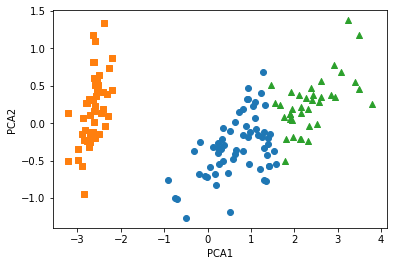

In [ ]:
def KMEANS_VIS():
    kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = None).fit(iris_KM_VIS_DF)
    kmeans.cluster_centers_
    
    iris_KM_VIS_DF['cluster'] = kmeans.labels_
    iris_KM_VIS_DF['target'] = iris.target
    
    mappingDF = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
    iris_KM_VIS_DF['target'] = iris_KM_VIS_DF['target'].map(lambda x : mappingDF[x])
    
    #iris_result = iris_KM_VIS_DF.groupby(['target','cluster'])['sepal length (cm)'].count()
    #print(iris_result)
    Visualize()

print("K-Means 수행 결과:")
KMEANS_VIS()

<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

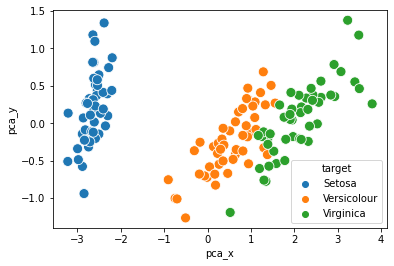

In [ ]:
# 정답값이랑 비교해보자
sns.scatterplot(x= 'pca_x', y = 'pca_y', data= iris_PCA_DF, hue=iris_PCA_DF['target'], s = 100)